In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Assignment 1

In [73]:
def fn(x):
    return (x - 6)**2 + np.sin(3*x)

def dy(x):
    return 2*(x-6) + 3 * np.cos(3*x)

0.09 36.0
4.314128789991315 3.2126968988447464
5.801406892848811 -0.9526951965439755
5.803401191840663 -0.952722579457036
5.8034012107424475 -0.9527225794570384
5.803401210742624 -0.9527225794570384
5.803401210742624 -0.9527225794570384
5.803401210742624 -0.9527225794570384
5.803401210742624 -0.9527225794570384
5.803401210742624 -0.9527225794570384


Text(0, 0.5, 'Y')

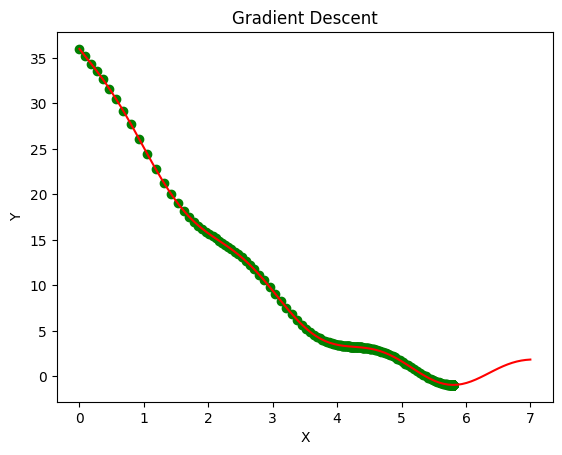

In [74]:
rate1 = 0.01
iter1 = 1000
x_val1 = []
y_val1 = []
x1 = 0
for i1 in range(iter1):
    y1 = fn(x1)
    x_val1.append(x1)
    y_val1.append(y1)
    x1 = x1 - rate1 * dy(x1)

    if(i1%100 == 0):
        print(x1, y1)

plt.plot(np.linspace(0, 7, 100), fn(np.linspace(0, 7, 100)), label="y = (x-6)^2 + sin(3x)", color='red')
plt.scatter(x_val1, y_val1, color='green')
plt.title('Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')

In [75]:
# as we decrease the learning rate it takes slower steps to go toward the minimum point so it becomes more accurate but it will take more times and iteration

# similarly when learning rate is increased it goes down faster toward descent

4.5 36.0


Text(0, 0.5, 'Y')

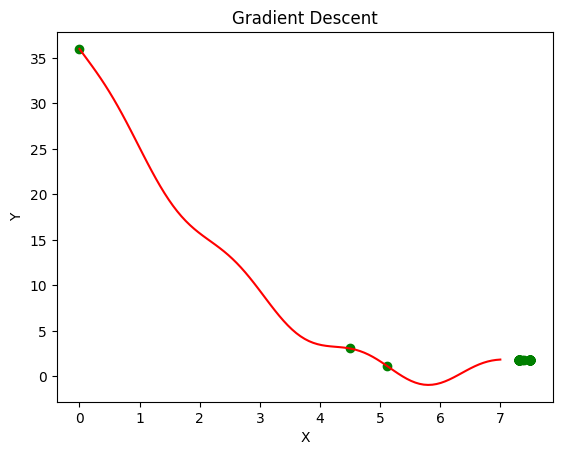

In [76]:
rate1 = 0.5
iter1 = 100
x_val1 = []
y_val1 = []
x1 = 0
for i1 in range(iter1):
    y1 = fn(x1)
    x_val1.append(x1)
    y_val1.append(y1)
    x1 = x1 - rate1 * dy(x1)

    if(i1%100 == 0):
        print(x1, y1)

plt.plot(np.linspace(0, 7, 100), fn(np.linspace(0, 7, 100)), label="y = (x-6)^2 + sin(3x)", color='red')
plt.scatter(x_val1, y_val1, color='green')
plt.title('Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')

In [77]:
# on increasing learning rate sometimes it may overshoots and correct descent may not come

# Assignment 2

In [78]:
x1 = np.random.normal(loc = 0, scale=2.5, size=500)
x2 = np.random.uniform(low=0, high=1, size=500)
x3 = np.random.uniform(low=10000, high=20000, size=500)
noise = np.random.normal(loc = 0, scale=2, size=500)
y = x1 + 10*x2 + 0.005*x3 + noise

# Assignment 3

In [79]:
b0 = 34*3/0.1
b1 = 34 * 5 / 0.08
b2 = np.random.rand()
b3 = np.random.rand()

In [80]:
lr = 1e-16
iter = 1000000

Iteration 0 SSE 82467147279.27907
Iteration 100000 SSE 13029552848.580448
Iteration 200000 SSE 12320796362.314528
Iteration 300000 SSE 12313560698.44146
Iteration 400000 SSE 12313485514.548027
Iteration 500000 SSE 12313483418.266249
Iteration 600000 SSE 12313482067.996851
Iteration 700000 SSE 12313480725.34224
Iteration 800000 SSE 12313479382.765438
Iteration 900000 SSE 12313478040.189503


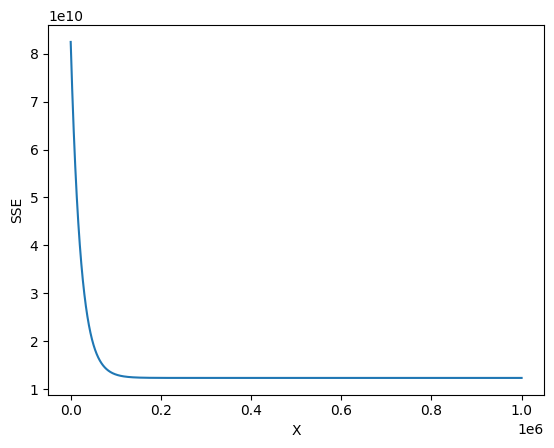

Final Coefficients:
beta0 = 1019.9999476871112
beta1 = 2124.9988425713236
beta2 = 0.03669136207130523
beta3 = -0.05731750152982538


In [81]:
sse_val = []
for i in range(iter):
    y_pred = b0 + b1 *x1 + b2 * x2 + b3*x3
    error = y - y_pred
    
    grad_b0 = -2 * np.sum(error)
    grad_b1 = -2 * np.sum(error*x1)
    grad_b2 = -2 * np.sum(error*x2)
    grad_b3 = -2 * np.sum(error*x3)

    b0 = b0 - lr * grad_b0
    b1 = b1 - lr * grad_b1
    b2 = b2 - lr * grad_b2
    b3 = b3 - lr * grad_b3

    sse = np.sum(error**2)
    sse_val.append(sse)
    if i%100000 == 0:
        print("Iteration", i, "SSE", sse)


plt.plot(sse_val)
plt.xlabel('X')
plt.ylabel('SSE')
plt.show()

print("Final Coefficients:")
print("beta0 =", b0)
print("beta1 =", b1)
print("beta2 =", b2)
print("beta3 =", b3)

# Assignment 4

In [107]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

b0 = 34*3/0.1
b1 = 34 * 5 / 0.08
b2 = np.random.rand()
b3 = np.random.rand()

scaler_x1 = StandardScaler()
scaler_x2_x3 = MinMaxScaler()

x1_scaled = scaler_x1.fit_transform(x1.reshape(-1, 1)).flatten()
x2_scaled = scaler_x2_x3.fit_transform(x2.reshape(-1, 1)).flatten()
x3_scaled = scaler_x2_x3.fit_transform(x3.reshape(-1, 1)).flatten()

X_scaled = np.vstack([np.ones_like(x1_scaled), x1_scaled, x2_scaled, x3_scaled]).T
y_scaled = y


In [109]:
def gradient_descent(X, y, learning_rate=1, iterations=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    sse_list = []
    
    for i in range(iterations):
        prediction = X.dot(theta)
        error = prediction - y
        cost = (1/(2*m)) * np.sum(error**2)
        sse_list.append(cost)
        
        gradient = (1/m) * X.T.dot(error)
        theta -= learning_rate * gradient
    
    return theta, sse_list


In [110]:
theta, sse_list = gradient_descent(X_scaled, y_scaled, learning_rate=1, iterations=1000)

In [111]:
beta0_actual = theta[0] - (theta[1] * np.mean(x1) + theta[2] * np.min(x2) / (np.max(x2) - np.min(x2)) + theta[3] * np.min(x3) / (np.max(x3) - np.min(x3)))
beta1_actual = theta[1] / np.std(x1)
beta2_actual = theta[2] / (np.max(x2) - np.min(x2))
beta3_actual = theta[3] / (np.max(x3) - np.min(x3))

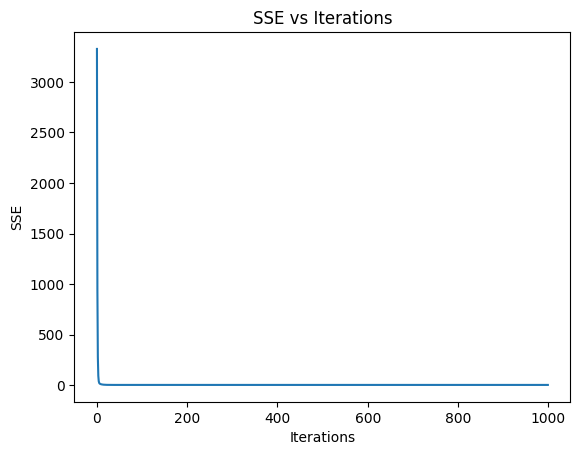

Final Coefficients (actual values after scaling adjustment):
beta0_actual = 0.6298733590581946
beta1_actual = 1.0436117098493902
beta2_actual = 9.612931640359255
beta3_actual = 0.004979182132317371


In [106]:
plt.plot(range(1000), sse_list)
plt.xlabel('Iterations')
plt.ylabel('SSE')
plt.title('SSE vs Iterations')
plt.show()

print(f"Final Coefficients (actual values after scaling adjustment):")
print(f"beta0_actual = {beta0_actual}")
print(f"beta1_actual = {beta1_actual}")
print(f"beta2_actual = {beta2_actual}")
print(f"beta3_actual = {beta3_actual}")

# Assignment 5

In [89]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [90]:
beta0 = 34 * 20
beta1 = 34 / 20

In [91]:
x = np.linspace(-10, 10, 50)
z = beta0 * x + beta1
y = sigmoid(z)

C:\Users\isang\AppData\Local\Temp\ipykernel_11796\91620759.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1+np.exp(-x))


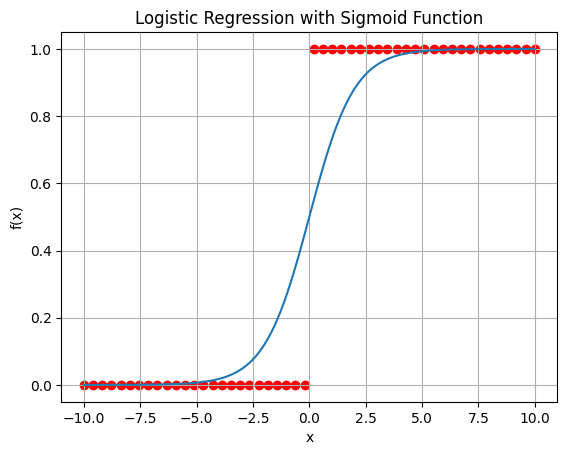

In [92]:
plt.plot(np.linspace(-10, 10, 10000), sigmoid(np.linspace(-10, 10, 10000)))
plt.scatter(x, y, color="red")
plt.title("Logistic Regression with Sigmoid Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

# Assignment 6

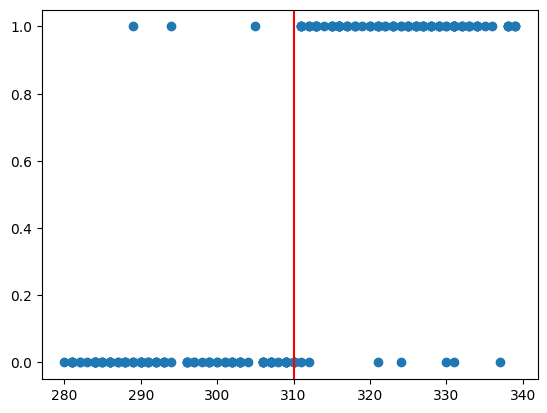

In [93]:
gre_score = np.random.randint(low=280 , high=340, size=200)
y=[]
for i in gre_score:
    if(i>310):
        y.append(1)
    else:
        y.append(0)

invert = np.random.choice(range(200), size=10, replace=True)

for i in invert:
    y[i] = 0 if y[i] == 1 else 1

plt.scatter(gre_score, y)
plt.axvline(x=310, color='r')

# Assignment 7

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
logr = LogisticRegression()

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(gre_score, y)

In [96]:
logr.fit(X_train.reshape(-1, 1), Y_train)

LogisticRegression()

In [97]:
y_pred = logr.predict(X_test.reshape(-1, 1))

In [98]:
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

0.94
[[25  3]
 [ 0 22]]


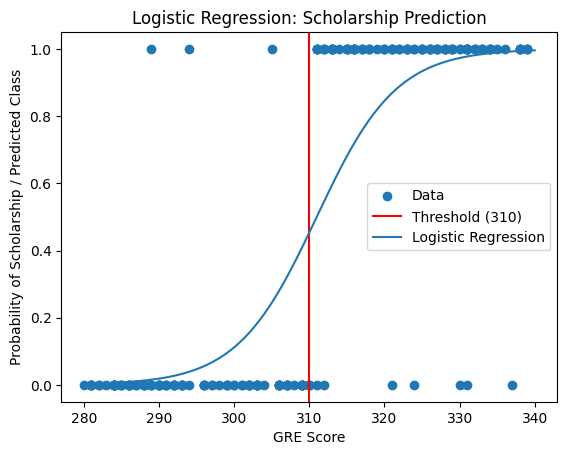

In [99]:
plt.scatter(gre_score, y, label='Data')
plt.axvline(x=310, color='r', label='Threshold (310)')

gre_range = np.linspace(280, 340, 200)
y_proba = logr.predict_proba(gre_range.reshape(-1, 1))[:, 1]
plt.plot(gre_range, y_proba, label='Logistic Regression')

plt.xlabel('GRE Score')
plt.ylabel('Probability of Scholarship / Predicted Class')
plt.title('Logistic Regression: Scholarship Prediction')
plt.legend()
plt.show()

In [100]:
test_gre = 320
probability = logr.predict_proba([[test_gre]])[:, 1]
if(probability>0.5):
    print("Scholarship")
else:
    print("No scholoarship")

direct_predict = logr.predict([[test_gre]])
if(direct_predict>0.5):
    print("Direct Scholarship")
else:
    print("No Direct scholoarship")

Scholarship
Direct Scholarship
